#Usando regressão linear para tentar prever o preço da BVSP

Este código tem apenas fins educacionais e não deve ser utilizado para fins comerciais.

O desenvolvimento deste modelo foi feito usando como referência o código desenvolvido por Aman Karhal, em seu site https://thecleverprogrammer.com



In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
yf.pdr_override()

ibov = web.get_data_yahoo("^BVSP")

[*********************100%***********************]  1 of 1 completed


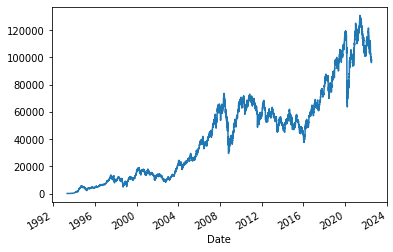

In [ ]:
ibov['Close'].plot()

#Verificando os melhores e piores dias da Bolsa

In [ ]:
ibov['Dif'] = ibov['Close'] - ibov['Open']

df = ibov.sort_values(by= ['Dif'], ascending = True)

Melhores dias da Bolsa

In [ ]:
df.sort_values(by = ['Dif'], ascending = False)[:10]

,Open,High,Low,Close,Adj Close,Volume,Dif
Date,,,,,,,
2020-03-13,72621.0,83758.0,72621.0,82678.0,82678.0,15766300,10057.0
2020-03-10,86071.0,92230.0,86071.0,92214.0,92214.0,13531700,6143.0
2020-03-24,63604.0,71535.0,63604.0,69729.0,69729.0,11679900,6125.0
2020-03-25,69727.0,76714.0,69360.0,74956.0,74956.0,12951100,5229.0
2008-10-13,35609.0,40829.0,35609.0,40829.0,40829.0,1974000,5220.0
2008-09-19,48424.0,53168.0,48424.0,53055.0,53055.0,2103800,4631.0
2020-04-06,69556.0,75260.0,69556.0,74073.0,74073.0,9685400,4517.0
2008-04-30,63826.0,68038.0,63826.0,67868.0,67868.0,2112800,4042.0
2008-10-28,29438.0,33387.0,29438.0,33387.0,33387.0,2342000,3949.0


Piores dias da bolsa

In [ ]:
piores_dias=df.sort_values(by = ['Dif'], ascending = False)[:-10]

#Usando regressão linear para prever o fechamento da Bolsa

In [ ]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out) #criando uma nova coluna chamada label com as últimas 5 linhas vazias
    X = np.array(df[[forecast_col]]) #criando a matriz com a feature
    X = preprocessing.scale(X) #processando a matriz
    X_lately = X[-forecast_out:] #criando a coluna que eu quero usar depois no método
    X = X[:-forecast_out] # X que vai receber o teste e o treinamento
    label.dropna(inplace=True)
    y = np.array(label)  # declarando Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) #validação cruazada

    response = [X_train,X_test , Y_train, Y_test , X_lately]
    return response

In [ ]:
forecast_col = 'Close' #definindo a coluna que queremos prever
forecast_out = 15 #definindo até quando eu quero prever
test_size = 0.2 #definindo o tamanho da base que será utilizada no modelo

In [ ]:
X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size); #chamando o método onde a validação cruzada  e os dados preparados estão
learner = LinearRegression() #iniciando o modelo de regressão linear

learner.fit(X_train,Y_train) #treinando o modelo

LinearRegression()

In [ ]:
score=learner.score(X_test,Y_test)#testando o modelo
forecast= learner.predict(X_lately) #definindo o forecast
response={}
response['pontuação do teste']=score
response['forecast_set']=forecast

print(response)

{'pontuação do teste': 0.10555002544882919, 'forecast_set': array([58733.51049124, 45596.338852  , 50753.44792249, 57108.18464949,
       65571.95349918, 58886.62353205, 39721.30782768, 52261.66592781,
       54518.35575732, 46874.3417627 , 42427.88086736, 54839.49308519,
       52938.49103219, 61116.03669158, 57647.89902612])}


#Resultado

O score do teste determina que este modelo não é capaz de prever o preço da BVSP.

A título de estudo, abaixo demonstrarei em um gráfico o valor previsto e onde os dados realmente estão. Em um modelo minimamente válido, seria esperado uma linha reta e com os valores seguindo a tendência da linha - o que não acontece no presente caso.

In [ ]:
import plotly.express as px # biblioteca para criar gráficos dinâmicos 


grafico = px.scatter(x = X_test.ravel()[-15:], y = Y_test[-15:])
grafico.add_scatter(x = X_test.ravel()[-15:], y = forecast, name= 'previsões')
grafico.show()